/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


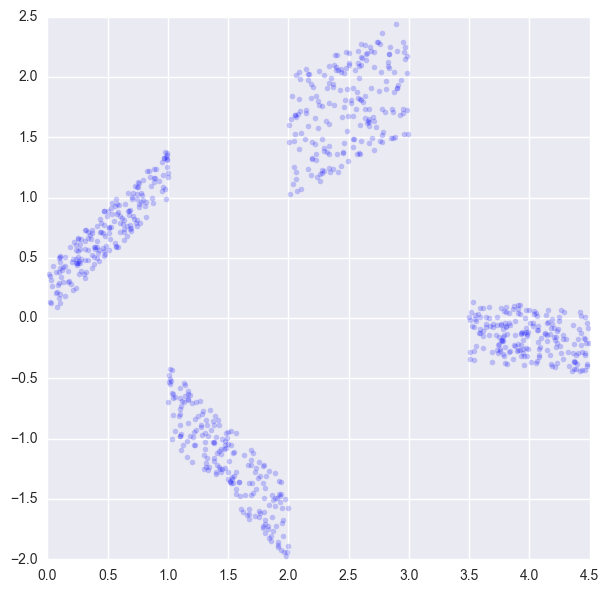

In [2]:
# USING SOMPY: https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11

import random
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import sompy
from scipy import stats
#from plotly.graph_objs import Data, Line
import time, sys
# huge images can't be displayed on a screen, so directly use Agg
#matplotlib.use("Agg")
import seaborn as sns
from datetime import datetime

### A toy example: two dimensional data, four clusters

dlen = 200

Data1 = pd.DataFrame(data= 1*np.random.rand(dlen,2))
Data1.values[:,1] = (Data1.values[:,0][:,np.newaxis] + .42*np.random.rand(dlen,1))[:,0]

Data2 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+1)
Data2.values[:,1] = (-1*Data2.values[:,0][:,np.newaxis] + .62*np.random.rand(dlen,1))[:,0]

Data3 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+2)
Data3.values[:,1] = (.5*Data3.values[:,0][:,np.newaxis] + 1*np.random.rand(dlen,1))[:,0]

Data4 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+3.5)
Data4.values[:,1] = (-.1*Data4.values[:,0][:,np.newaxis] + .5*np.random.rand(dlen,1))[:,0]


Data1 = np.concatenate((Data1,Data2,Data3,Data4))

fig = plt.figure()
plt.plot(Data1[:,0],Data1[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)




In [3]:
mapsize = [20,20]
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  
# this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')

 Training...
/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
 pca_linear_initialization took: 0.013000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 15

 epoch: 1 ---> elapsed time:  0.122000, quantization error: 0.230279

 epoch: 2 ---> elapsed time:  0.113000, quantization error: 0.111441

 epoch: 3 ---> elapsed time:  0.108000, quantization error: 0.076920

 epoch: 4 ---> elapsed time:  0.110000, quantization error: 0.073163

 epoch: 5 ---> elapsed time:  0.109000, quantization error: 0.068871

 epoch: 6 ---> elapsed time:  0.110000, quantization error: 0.063886

 epoch: 7 ---> elapsed time:  0.107000, quantization error: 

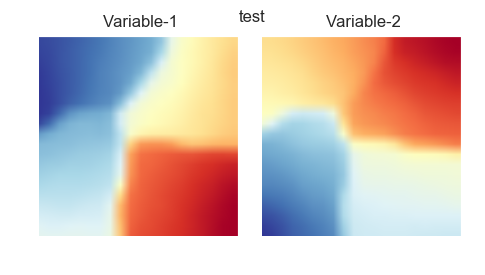

In [4]:
v = sompy.mapview.View2DPacked(50, 50, 'test', text_size=8)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6)
plt.show()

In [5]:
mapsize = [30,30]
som = sompy.SOMFactory.build(Data2, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything
mapsize = [30,30]
som = sompy.SOMFactory.build(Data2, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything


 Training...
/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
 pca_linear_initialization took: 0.013000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 135

 epoch: 1 ---> elapsed time:  0.126000, quantization error: 0.249157

 epoch: 2 ---> elapsed time:  0.133000, quantization error: 0.131355

 epoch: 3 ---> elapsed time:  0.129000, quantization error: 0.102831

 epoch: 4 ---> elapsed time:  0.137000, quantization error: 0.098389

 epoch: 5 ---> elapsed time:  0.129000, quantization error: 0.096762

 epoch: 6 ---> elapsed time:  0.128000, quantization error: 0.094694

 epoch: 7 ---> elapsed time:  0.128000, quantization error:

In [6]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

Exception: Data must be 1-dimensional

In [7]:
#In this case, K-means simply fails as expected
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
v.show(som, what='cluster')
v.save('kmeans_test')

Exception: Data must be 1-dimensional

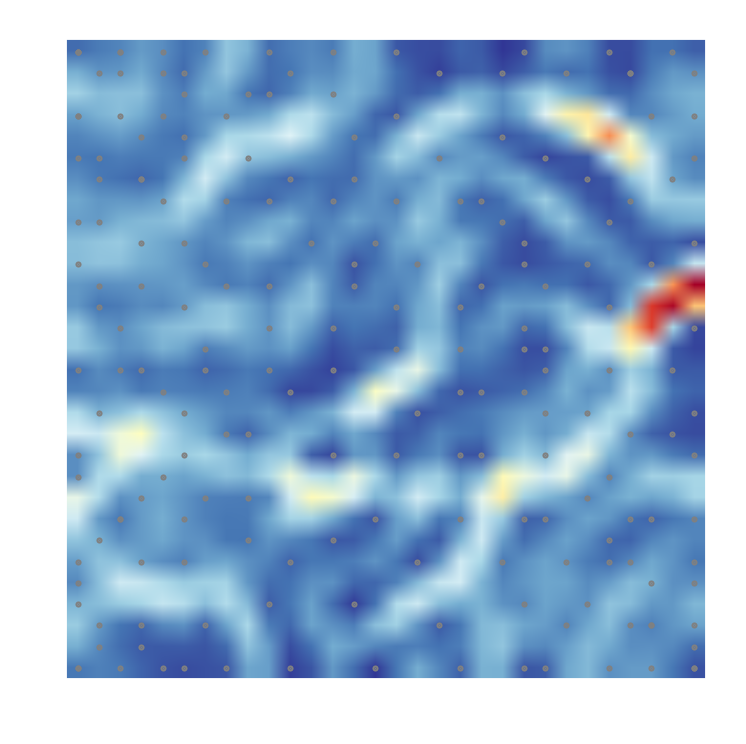

In [8]:
#But Umatrix finds the clusters easily
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)